In [5]:
from sklearn import tree
import pandas as pd
import matplotlib as plt
import seaborn as sns
%matplolib inline
from sklearn.tree import plot_tree

UsageError: Line magic function `%matplolib` not found.


In [6]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [7]:
from IPython.display import HTML
style ="<style>svg{width^70% !imoprtant;height:70% !important;}</style>"
HTML(style)

In [8]:
data = pd.DataFrame({'X_1': [1, 1, 1, 0, 0, 0, 0, 1], 'X_2': [0, 0, 0, 1, 0, 0, 0, 1], 'Y': [1, 1, 1, 1, 0, 0, 0, 0]})

In [9]:
data

,X_1,X_2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0
5,0,0,0
6,0,0,0
7,1,1,0


In [10]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [11]:
clf

DecisionTreeClassifier(criterion='entropy')

In [12]:
X = data[['X_1', 'X_2']]
y = data.Y

In [13]:
clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

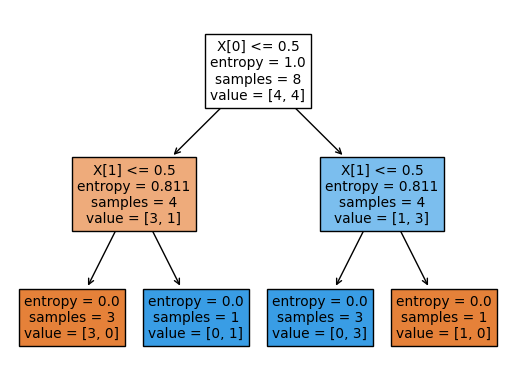

In [14]:
tree.plot_tree(clf,filled=True); 

In [15]:
# Представьте, что вы решили научить робота для животных отличать собачек от котиков. Для начала проанализируем данные - 
#отметьте все верные утверждения о данном датафрэйме

In [16]:
dog_cat = pd.read_csv('https://stepik.org/media/attachments/course/4852/dogs.csv')

In [17]:
dog_cat

,Unnamed: 0,Шерстист,Гавкает,Лазает по деревьям,Вид
0,0,1,1,0,собачка
1,1,1,1,0,собачка
2,2,1,1,0,собачка
3,3,1,1,0,собачка
4,4,1,0,1,котик
5,5,1,0,1,котик
6,6,1,0,1,котик
7,7,1,0,1,котик


In [18]:
# Переменная Лазает по деревьям позволяет идеально различить 2 вида по исходным данным

# Обе переменные Гавкает и Лазает по деревьям дают одинаковый Information Gain, если поместить их в вершину дерева

# Для различения котиков от собачек, по этим данным, хватит всего 1-ой переменной

# Переменная Гавкает позволяет идеально различить 2 вида по исходным данным

In [19]:
# В нашем Big Data датасэте появились новые наблюдения! Давайте немного посчитаем энтропию, чтобы лучше понять, 
# формализуемость разделения на группы.

In [20]:
cat = pd.read_csv('https://stepik.org/media/attachments/course/4852/cats.csv')

In [21]:
cat

,Unnamed: 0,Шерстист,Гавкает,Лазает по деревьям,Вид
0,0,1,1,0,собачка
1,1,1,1,0,собачка
2,2,1,1,0,собачка
3,3,1,1,0,собачка
4,4,1,0,1,котик
5,5,1,0,1,котик
6,6,1,0,1,котик
7,7,1,0,1,котик
8,8,1,1,1,котик
9,9,0,0,1,котик


In [22]:
# Формат записи - энтропия в группе, где переменная равна 0 и энтропия в группе, где переменная равна 1 
# (десятичный разделитель - точка, округляйте до 2-ого знака при необходимости).

In [23]:
import math

In [24]:
E_sh_sob=(1/1)*math.log2((1/1)) - 0
E_sh_kot=-(4/9)*math.log2((4/9)) - (5/9)*math.log2((5/9))
E_gav_sob=0 - (5/5)*math.log2((5/5))
E_gav_kot=-(4/5)*math.log2((4/5)) - (1/5)*math.log2((1/5))
E_laz_sob= (4/4)*math.log2((4/4)) - 0 
E_laz_kot=0 - (6/6)*math.log2((6/6))

In [25]:
E_sh_sob

0.0

In [26]:
E_sh_kot

0.9910760598382222

In [27]:
E_gav_sob

0.0

In [28]:
E_gav_kot

0.7219280948873623

In [29]:
E_laz_sob


0.0

In [30]:
E_laz_kot

0.0

In [32]:
from scipy.stats import entropy

def ent(data):
  return entropy(data.Вид.value_counts() / len(data), base=2)


df = pd.read_csv('https://stepik.org/media/attachments/course/4852/cats.csv', index_col=0)
print('Шерстист на 0: ', ent(df[df.Шерстист == 0]))
print('Шерстист на 1: ', ent(df[df.Шерстист == 1]))
print('Гавкает на 0: ', ent(df[df.Гавкает == 0]))
print('Гавкает на 1: ', ent(df[df.Гавкает == 1]))
print('Лазает по деревьям на 0: ', ent(df[df['Лазает по деревьям'] == 0]))
print('Лазает по деревьям на 1: ', ent(df[df['Лазает по деревьям'] == 1]))

Шерстист на 0:  0.0
Шерстист на 1:  0.9910760598382222
Гавкает на 0:  0.0
Гавкает на 1:  0.7219280948873623
Лазает по деревьям на 0:  0.0
Лазает по деревьям на 1:  0.0


In [33]:
# Ещё немного арифметики - посчитаем Information Gain по данным из предыдущего задания. Впишите через пробел округлённые 
# до 2-ого знака значения IG для фичей Шерстист, Гавкает и Лазает по деревьям. Десятичным разделителем в данном задании 
# является точка.
# По какой переменной нужно делать сплит, исходя из всего этого (не вводите ответ на этот вопрос в поле, просто подумайте)

In [34]:
E = -(4/10)*math.log2((4/10)) - (6/10)*math.log2((6/10))

In [35]:
E

0.9709505944546686

In [36]:
IG_sh = E - ((1/10)*E_sh_sob + (9/10)*E_sh_kot)
IG_gav = E - ((5/10)*E_gav_sob + (5/10)*E_gav_kot)
IG_laz = E - ((6/10)*E_laz_sob + (6/10)*E_laz_kot)

In [37]:
round(IG_sh, 2)

0.08

In [38]:
round(IG_gav, 2)

0.61

In [39]:
IG_laz

0.9709505944546686

In [40]:
clf1 = tree.DecisionTreeClassifier(criterion='entropy')

In [41]:
X = cat[['Шерстист', 'Гавкает', 'Лазает по деревьям']]
y = cat.Вид

In [42]:
clf1.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

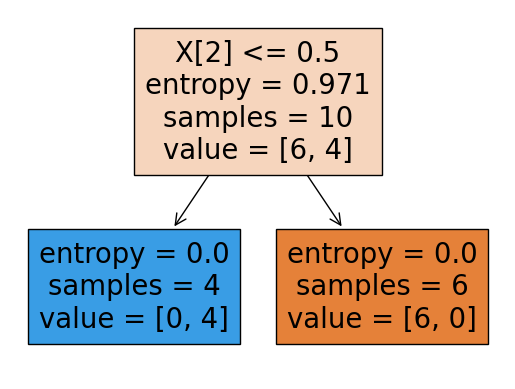

In [43]:
tree.plot_tree(clf1,filled=True); 

In [44]:
def ent(data):
  return entropy(data.Вид.value_counts() / len(data), base=2)


def ig(data, feature):
  ent0 = ent(data[data[feature] == 0])
  ent1 = ent(data[data[feature] == 1])
  n = len(data)
  n0 = len(data[data[feature] == 0])
  n1 = len(data[data[feature] == 1])
  return round(ent(data) - ent0 * n0 / n - ent1 * n1 / n, 2)


df = pd.read_csv('https://stepik.org/media/attachments/course/4852/cats.csv', index_col=0)

print('IG по шертистости: ', ig(df, 'Шерстист'))
print('IG по голосу: ', ig(df, 'Гавкает'))
print('IG по деревьям: ', ig(df, 'Лазает по деревьям'))

IG по шертистости:  0.08
IG по голосу:  0.61
IG по деревьям:  0.97


In [58]:
# Load train data
titanik_data = pd.read_csv('train.csv')

In [59]:
# Look
titanik_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [60]:
# Find NaN
# Determine the sum of missing values by columns
titanik_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [62]:
# Remove redundant data that will not be used to build the model
X = titanik_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)

In [64]:
# Let us replace the unknown values of age with its median value
X = X.fillna({'Age' : X.Age.median()})

In [65]:
X.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [66]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,28.0,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [67]:
# Get rid of string values, convert them to numbers
X = pd.get_dummies(X)

In [68]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,28.0,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


In [69]:
# Define the variable to be predicted
y = titanik_data.Survived

In [72]:
# Let's create a classifier
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [73]:
#Train the model
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [88]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin' 

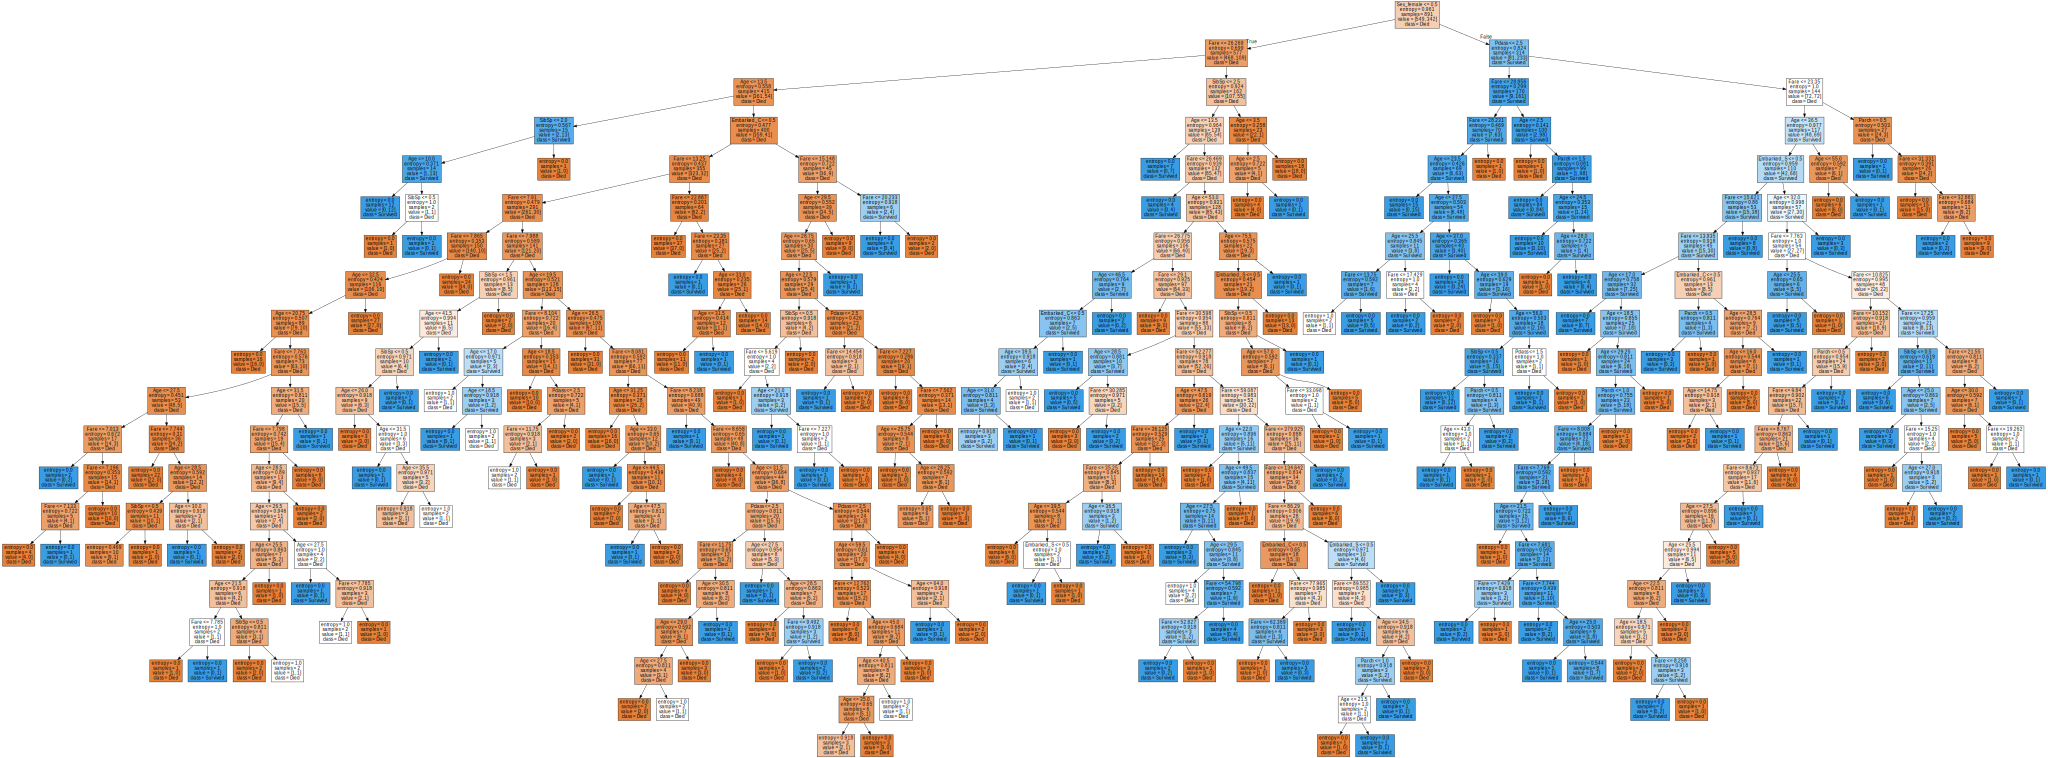

In [89]:
graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=list(X), \
                                    class_names=['Died', 'Survived'], filled=True))
display(SVG(graph.pipe(format='svg')))

In [91]:
# determine the number of correct answers of our tree
clf.score(X, y)

0.9797979797979798

In [90]:
# Let's divide the data into the data on which our tree is trained and the data for the test
from sklearn.model_selection import train_test_split

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [94]:
# train our model with new data
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [95]:
# determine the number of correct answers of our tree
clf.score(X_train, y_train)

0.9798657718120806

In [96]:
# Let's check our model on data that the model has not seen
clf.score(X_test, y_test)

0.7694915254237288

In [ ]:
# We got a fairly low percentage according to new data. May be due to retraining of the model.

In [104]:
# Limit the depth of the tree. The number 3 was chosen by comparing the percentages of the model definition
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [105]:
# train our model with new data
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [106]:
# determine the number of correct answers of our tree
clf.score(X_train, y_train)

0.8238255033557047

In [107]:
# Let's check our model on data that the model has not seen
clf.score(X_test, y_test)

0.8203389830508474